In [63]:
#!/usr/bin/env python3

import numpy as np
import math
from collections import deque

class Node:
	"""docstring for Node"""
	def __init__(self, arr):
		self.arr = arr
		self.g = None
		self.h = None
		self.cost = None
		self.parent = None
		self.step = None


def get_setup():
	s_p1 = [-1.25, 0, 3.5]
	s_p2 = [0, -1.25, 3.5]
	s_p3 = [1.25, 0, 3.5]

	# g_p1 = [-1.25, 0, 1.5]
	# g_p2 = [0, -1.25, 1.5]
	# g_p3 = [1.25, 0, 1.5]

	# g_p1 = [0, -1.25, 0.5]
	# g_p2 = [1.25, 0, 0.5]
	# g_p3 = [0, 1.25, 0.5]
	g_p1 = [0, -1.25, 3.5]
	g_p2 = [0, 0, 4]
	g_p3 = [0, 1.25, 3.5]

	start = np.array([s_p1, s_p2, s_p3])
	goal = np.array([g_p1, g_p2, g_p3])

	return start, goal


def neighbours(s_node):
	fingers = s_node.arr
	directions = ["UP", "DOWN", "CW", "CCW", "PVT"]
	n_list = []
	for d in directions:
		temp = np.array(fingers, copy=True)  
		if  d == "UP":
			if fingers[0][2] + 1 < 4:
				temp[0][2] += 1
				temp[1][2] += 1
				temp[2][2] += 1
				n_list.append((d, temp))
		if d == "DOWN":
			if fingers[0][2] - 1 > -4:
				temp[0][2] -= 1
				temp[1][2] -= 1
				temp[2][2] -= 1
				n_list.append((d, temp))
		if d == "CW" or d == "CCW":
			temp[0] = rot_point(temp[0], d)
			temp[1] = rot_point(temp[1], d)
			temp[2] = rot_point(temp[2], d)
			n_list.append((d, temp))
		if d == "PVT":
			temp[1] = [0, 0, 4]
			n_list.append((d, temp))

	return n_list

def rot_point(point, direction):
	if direction != "PVT":
		if direction == "CW":
			theta = np.pi/2
		if direction == "CCW":
			theta = -np.pi/2
		rot_mat_z = np.array([[round(math.cos(theta), 2), round(-math.sin(theta), 2), 0],
	                        [round(math.sin(theta), 2), round(math.cos(theta), 2), 0],
	                        [0, 0, 1]])
		new_point = rot_mat_z.dot(point)
	else:
		pass


	return new_point

def gcost(direction):
	if direction == "UP" or direction == "DOWN":
		return 1.0
	if direction == "CW" or direction == "CCW":
		return 5.5
	if direction == "PVT":
		return 10


def astar(start, goal):
	found = False
	visit = deque([])
	q = []
	steps = 0
	path = []
	if np.array_equal(start, goal, equal_nan=False):
		return path, steps

	s_node = Node(start)
	s_node.cost = 0
	s_node.g = 0
	s_node.h = 0

	visit.append((tuple(start[0]),tuple(start[1]),tuple(start[2])))


	while not found:
		if np.array_equal(s_node.arr, goal, equal_nan=False):
			found = True
			break
		else:
			for node in neighbours(s_node):
				fingers = node[1]

				if (tuple(fingers[0]),tuple(fingers[1]),tuple(fingers[2])) not in visit:
					h_total = 0
					for i in range(len(fingers)):
						h = 0 
						h = np.sqrt((fingers[i][0]-goal[i][0])**2 + (fingers[i][1]-goal[i][1])**2 + (fingers[i][2]-goal[i][2])**2)
						h_total += h

					temp_obj = Node(fingers)
					temp_obj.h = h_total
					temp_obj.parent = s_node
					temp_obj.g = s_node.g + gcost(node[0])
					temp_obj.cost = temp_obj.g + temp_obj.h
					temp_obj.step = node[0]
					q.append((temp_obj, temp_obj.cost))
					

			q.sort(key = lambda x:x[1])
			priority = q.pop(0)
			s_node = priority[0]
			visit.append((tuple(s_node.arr[0]),tuple(s_node.arr[1]),tuple(s_node.arr[2])))

	steps = len(visit)
	while s_node.parent is not None:
		path.append(s_node.step)
		s_node = s_node.parent
	path.reverse()

	return path, steps

def points(start, goal, path):
    n_list = []

    for i in range(len(path)):
        for j in range(len(start)):
            if path[i] == 'UP':
                p = [start[j][0], start[j][1], start[j][2]+1]
                n_list.append(p)
            if path[i] == 'DOWN':
                p = [start[j][0], start[j][1], start[j][2]-1]
                n_list.append(p)
            if path[i] == 'CW' or path[i] == 'CCW':
                p = list(rot_point(start[j], path[i]))
                n_list.append(p)
#             if path[i] == 'PVT':
#                 p = [start[j][0], , start[j][2]]
#                 n_list.append(p)
        start = n_list[len(n_list)-3], n_list[len(n_list)-2],n_list[len(n_list)-1]
    
    return n_list

if __name__ == "__main__":
    start, goal = get_setup()
    path, steps = astar(start, goal)
	# print(start[0][2], "start")
	# print("goal", goal)
    print("start: \n", start)
    print("goal: \n", goal)
    print("\n")
    print("actions:", path)
    print("\n")
    print("path:")
    print(list(rot_point([-1.25,  0.,    3.5 ], "CW")), list(rot_point( [0.,   -1.25,  3.5 ], "CW")), list(rot_point( [ 1.25,  0.,   3.5 ], "CW")))
    print([ 0,   -1.25,  3.5 ],  [ 0,    0,    4.  ],  [ 0,    1.25,  3.5 ])

start: 
 [[-1.25  0.    3.5 ]
 [ 0.   -1.25  3.5 ]
 [ 1.25  0.    3.5 ]]
goal: 
 [[ 0.   -1.25  3.5 ]
 [ 0.    0.    4.  ]
 [ 0.    1.25  3.5 ]]


actions: ['CW', 'PVT']


path:
[0.0, -1.25, 3.5] [1.25, 0.0, 3.5] [0.0, 1.25, 3.5]
[0, -1.25, 3.5] [0, 0, 4.0] [0, 1.25, 3.5]


In [17]:
list(rot_point([-1.25,  0.,    3.5 ], "CW")), list(rot_point( [0.,   -1.25,  3.5 ], "CW")), list(rot_point( [ 1.25,  0.,   3.5 ], "CW"))

([0.0, -1.25, 3.5], [1.25, 0.0, 3.5], [0.0, 1.25, 3.5])

<IPython.core.display.Javascript object>


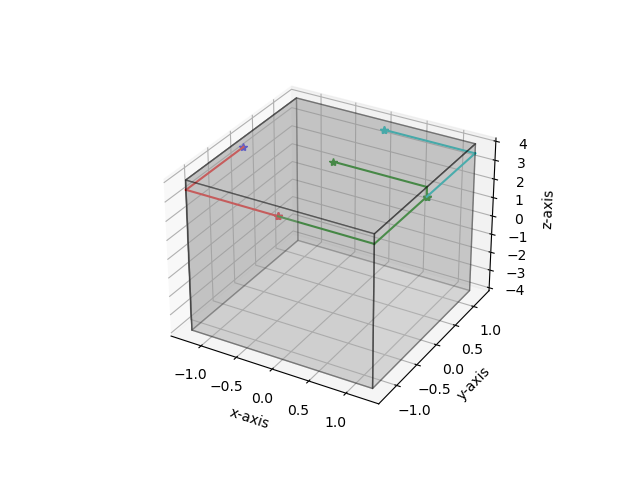

In [65]:
path1 = ([-1.25 , 0.   , 3.5 ],[0.0, -1.25, 3.5], [ 0.,   -1.25,  3.5 ])
path2 = ([ 0.  , -1.25 , 3.5 ], [1.25, 0.0, 3.5], [ 0. ,   0.  ,  4.  ])
path3 = ([ 1.25,  0. ,   3.5 ], [0.0, 1.25, 3.5], [ 0. ,   1.25,  3.5 ])
path =  ["CW", 'PVT']

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def cuboid_data(o, size=(1,1,1)):
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

def plotCubeAt(pos=(0,0,0), size=(1,1,1), ax=None,**kwargs):
    # Plotting a cube element at position pos
    if ax !=None:
        X, Y, Z = cuboid_data( pos, size )
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, **kwargs)

positions = [(-1.25,-1.25,-4.0)]
sizes = [(2.5,2.5,8)]
colors = ["white"]

fig = plt.figure()

ax = fig.gca(projection='3d')
ax.set_aspect('auto')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

for p,s,c in zip(positions,sizes,colors):
    plotCubeAt(pos=p, size=s, ax=ax, color=c, alpha = 0.2, ec='k')

x,y,z = start[0]
plt.plot(x,y,z,'b*')

x,y,z = start[1]
plt.plot(x,y,z,'b*')

x,y,z = start[2]
plt.plot(x,y,z,'b*')

x,y,z = [1.25, 0.0, 3.5]
plt.plot(x,y,z,'g*')

for i in range(len(path)):
    if i<len(path):
        x1,y1,z1 = path1[i]
        x2,y2,z2 = path1[i+1]
        plt.plot(x2,y2,z2,'r*')
        if path[i] == 'UP':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='r')
        if path[i] == 'DOWN':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='r')
        
        if path[i] == 'CW'  or path[i] == 'CCW' :
            x3, y3, z3 = x2+x1, y1+y2, z1
            plt.plot([x1, x3], [y1, y3], [z1, z3], marker = '', color='r')
            plt.plot([x3, x2], [y3, y2], [z3, z2], marker = '', color='r')

for i in range(len(path)):
    if i<len(path):
        x1,y1,z1 = path2[i]
        x2,y2,z2 = path2[i+1]
        plt.plot(x2,y2,z2,'g*')
        if path[i] == 'UP':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='g')
        if path[i] == 'DOWN':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='g')
        
        if path[i] == 'CW'  or path[i] == 'CCW' or path[i] == "PVT":
            x3, y3, z3 = x2+x1, y1+y2, z2
            plt.plot([x1, x3], [y1, y3], [z1, z3], marker = '', color='g')
            plt.plot([x3, x2], [y3, y2], [z3, z2], marker = '', color='g')

for i in range(len(path)):
    if i<len(path):
        x1,y1,z1 = path3[i]
        x2,y2,z2 = path3[i+1]
        plt.plot(x2,y2,z2,'c*')
        if path[i] == 'UP':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='c')
        if path[i] == 'DOWN':
            plt.plot([x1, x2], [y1, y2], [z1, z2], marker = '', color='c')
        
        if path[i] == 'CW'  or path[i] == 'CCW' :
            x3, y3, z3 = x2+x1, y1+y2, z1
            plt.plot([x1, x3], [y1, y3], [z1, z3], marker = '', color='c')
            plt.plot([x3, x2], [y3, y2], [z3, z2], marker = '', color='c')
